### <center> Electricity Consumption Prediction </center>

### Importing Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [4]:
EC = pd.read_excel("City Power Consumption.xlsx")

### Performing Basic Operations On The Dataset

In [5]:
EC.size

473247

In [6]:
EC.shape

(52583, 9)

In [7]:
EC.columns

Index(['S no', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Air Quality Index (PM)',
       'Cloudiness', ' Power Consumption in A Zone'],
      dtype='object')

In [8]:
EC.head()

,S no,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,1,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,2,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354
2,3,6.313,74.5,0.080,0.062,0.100,151.0,1,29128.10127
3,4,6.121,75,0.083,0.091,0.096,151.0,1,28228.86076
4,5,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620


In [9]:
EC.tail()

,S no,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
52578,52579,NaN,75.6,0.094,436.2,38.96,157.0,0,34444.55696
52579,52580,NaN,73.5,0.089,451.6,37.73,157.0,0,34438.48101
52580,52581,NaN,70.1,0.085,466.4,37.49,157.0,0,33873.41772
52581,52582,NaN,67.75,0.086,477.0,37.37,152.0,0,33988.86076
52582,52583,NaN,66.24,0.088,485.7,36.72,155.0,0,34158.98734


In [10]:
EC.describe()

,S no,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
count,52583.000000,52512.000000,52275.000000,52568.000000,52565.000000,52583.000000,52583.000000
mean,26292.000000,1.955320,182.964247,74.872330,154.499191,0.009338,31061.821779
std,15179.548939,2.347914,264.571351,124.084858,2.871553,0.096180,8021.057455
min,1.000000,0.050000,0.004000,0.011000,150.000000,0.000000,9457.750760
25%,13146.500000,0.078000,0.062000,0.122000,152.000000,0.000000,24738.858990
50%,26292.000000,0.086000,5.226000,4.412000,155.000000,0.000000,31189.787230
75%,39437.500000,4.915000,320.100000,100.500000,157.000000,0.000000,36721.582445
max,52583.000000,6.483000,1163.000000,936.000000,159.000000,1.000000,52204.395120


In [11]:
EC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   S no                          52583 non-null  int64  
 1   Temperature                   52263 non-null  object 
 2   Humidity                      52558 non-null  object 
 3   Wind Speed                    52512 non-null  float64
 4   general diffuse flows         52275 non-null  float64
 5   diffuse flows                 52568 non-null  float64
 6   Air Quality Index (PM)        52565 non-null  float64
 7   Cloudiness                    52583 non-null  int64  
 8    Power Consumption in A Zone  52583 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 3.6+ MB


In [12]:
EC.describe(include = object)

,Temperature,Humidity
count,52263.00,52558.0
unique,3438.00,4444.0
top,20.76,85.9
freq,56.00,200.0


### <center>Dealing with Null Values</center>

In [13]:
EC.isnull().sum()

S no                              0
Temperature                     320
Humidity                         25
Wind Speed                       71
general diffuse flows           308
diffuse flows                    15
Air Quality Index (PM)           18
Cloudiness                        0
 Power Consumption in A Zone      0
dtype: int64

In [14]:
# Dropping S.No as it is not Necessary
EC.drop("S no",axis=1,inplace = True)

In [15]:
EC.head(1)

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.6962


In [16]:
temp = EC.copy()

In [17]:
temp.dropna(axis = 0,inplace = True)

In [18]:
temp

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354
2,6.313,74.5,0.080,0.062,0.100,151.0,1,29128.10127
3,6.121,75,0.083,0.091,0.096,151.0,1,28228.86076
4,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620
...,...,...,...,...,...,...,...,...
52411,7.01,72.4,0.080,0.040,0.096,153.0,0,31160.45627
52412,6.947,72.6,0.082,0.051,0.093,153.0,0,30430.41825
52413,6.9,72.8,0.086,0.084,0.074,157.0,0,29590.87452
52414,6.758,73,0.080,0.066,0.089,150.0,0,28958.17490


In [19]:
temp.size

417160

In [20]:
temp.shape

(52145, 8)

In [21]:
EC.shape

(52583, 8)

In [22]:
temp.isnull().sum()

Temperature                     0
Humidity                        0
Wind Speed                      0
general diffuse flows           0
diffuse flows                   0
Air Quality Index (PM)          0
Cloudiness                      0
 Power Consumption in A Zone    0
dtype: int64

In [23]:
print(52583 - 52145)

438


In [24]:
temp.describe()

,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
count,52145.000000,52145.000000,52145.000000,52145.000000,52145.000000,52145.000000
mean,1.968434,182.861960,75.195083,154.499530,0.007038,31112.183719
std,2.350838,264.757717,124.433309,2.872062,0.083598,8008.047631
min,0.050000,0.004000,0.011000,150.000000,0.000000,9457.750760
25%,0.078000,0.062000,0.122000,152.000000,0.000000,24804.551420
50%,0.086000,4.987000,4.411000,155.000000,0.000000,31236.196720
75%,4.915000,319.600000,101.300000,157.000000,0.000000,36763.076920
max,6.483000,1163.000000,936.000000,159.000000,1.000000,52204.395120


In [25]:
temp["Temperature"] = pd.to_numeric(temp["Temperature"],errors = 'coerce')

In [26]:
temp.isnull().sum()

Temperature                     1
Humidity                        0
Wind Speed                      0
general diffuse flows           0
diffuse flows                   0
Air Quality Index (PM)          0
Cloudiness                      0
 Power Consumption in A Zone    0
dtype: int64

In [27]:
temp["Humidity"] = pd.to_numeric(temp["Humidity"],errors = 'coerce')

In [28]:
temp.isnull().sum()

Temperature                     1
Humidity                        1
Wind Speed                      0
general diffuse flows           0
diffuse flows                   0
Air Quality Index (PM)          0
Cloudiness                      0
 Power Consumption in A Zone    0
dtype: int64

In [29]:
temp.dropna(axis=0,inplace = True)

In [30]:
temp.isnull().sum()

Temperature                     0
Humidity                        0
Wind Speed                      0
general diffuse flows           0
diffuse flows                   0
Air Quality Index (PM)          0
Cloudiness                      0
 Power Consumption in A Zone    0
dtype: int64

In [31]:
temp.shape

(52143, 8)

In [32]:
temp.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
count,52143.000000,52143.000000,52143.000000,52143.000000,52143.000000,52143.000000,52143.000000,52143.000000
mean,18.841426,68.237918,1.968506,182.868973,75.197962,154.499568,0.007038,31112.707495
std,5.810140,15.571206,2.350854,264.760374,124.434827,2.872095,0.083600,8007.743843
min,3.247000,11.340000,0.050000,0.004000,0.011000,150.000000,0.000000,9457.750760
25%,14.430000,58.270000,0.078000,0.062000,0.122000,152.000000,0.000000,24804.658690
50%,18.840000,69.850000,0.086000,4.998000,4.413000,155.000000,0.000000,31236.196720
75%,22.920000,81.400000,4.915000,319.650000,101.300000,157.000000,0.000000,36763.076920
max,40.010000,94.800000,6.483000,1163.000000,936.000000,159.000000,1.000000,52204.395120


## <center> Correlation Calculation </center>

In [33]:
temp.corr()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
Temperature,1.000000,-0.459789,0.475747,0.460771,0.195394,-0.003076,-0.094442,0.558985
Humidity,-0.459789,1.000000,-0.135289,-0.467480,-0.256280,0.003742,0.021743,-0.229806
Wind Speed,0.475747,-0.135289,1.000000,0.133860,-0.001858,0.000955,-0.064043,0.203833
general diffuse flows,0.460771,-0.467480,0.133860,1.000000,0.565072,-0.001331,-0.023810,0.208926
diffuse flows,0.195394,-0.256280,-0.001858,0.565072,1.000000,-0.002161,-0.034427,0.060870
Air Quality Index (PM),-0.003076,0.003742,0.000955,-0.001331,-0.002161,1.000000,-0.001864,-0.001939
Cloudiness,-0.094442,0.021743,-0.064043,-0.023810,-0.034427,-0.001864,1.000000,-0.104553
Power Consumption in A Zone,0.558985,-0.229806,0.203833,0.208926,0.060870,-0.001939,-0.104553,1.000000


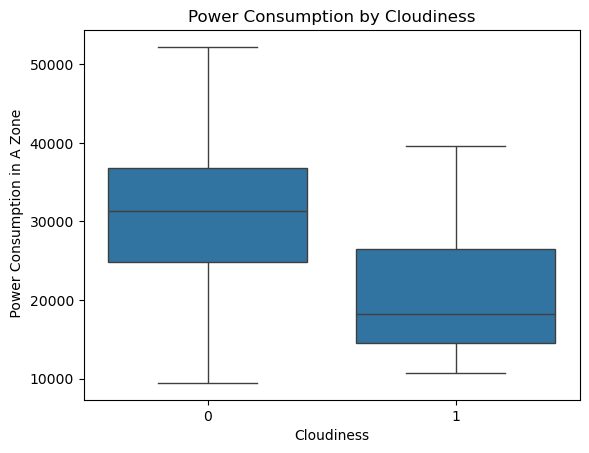

In [35]:
sns.boxplot(x='Cloudiness', y=' Power Consumption in A Zone', data=temp)
plt.title("Power Consumption by Cloudiness")
plt.show()

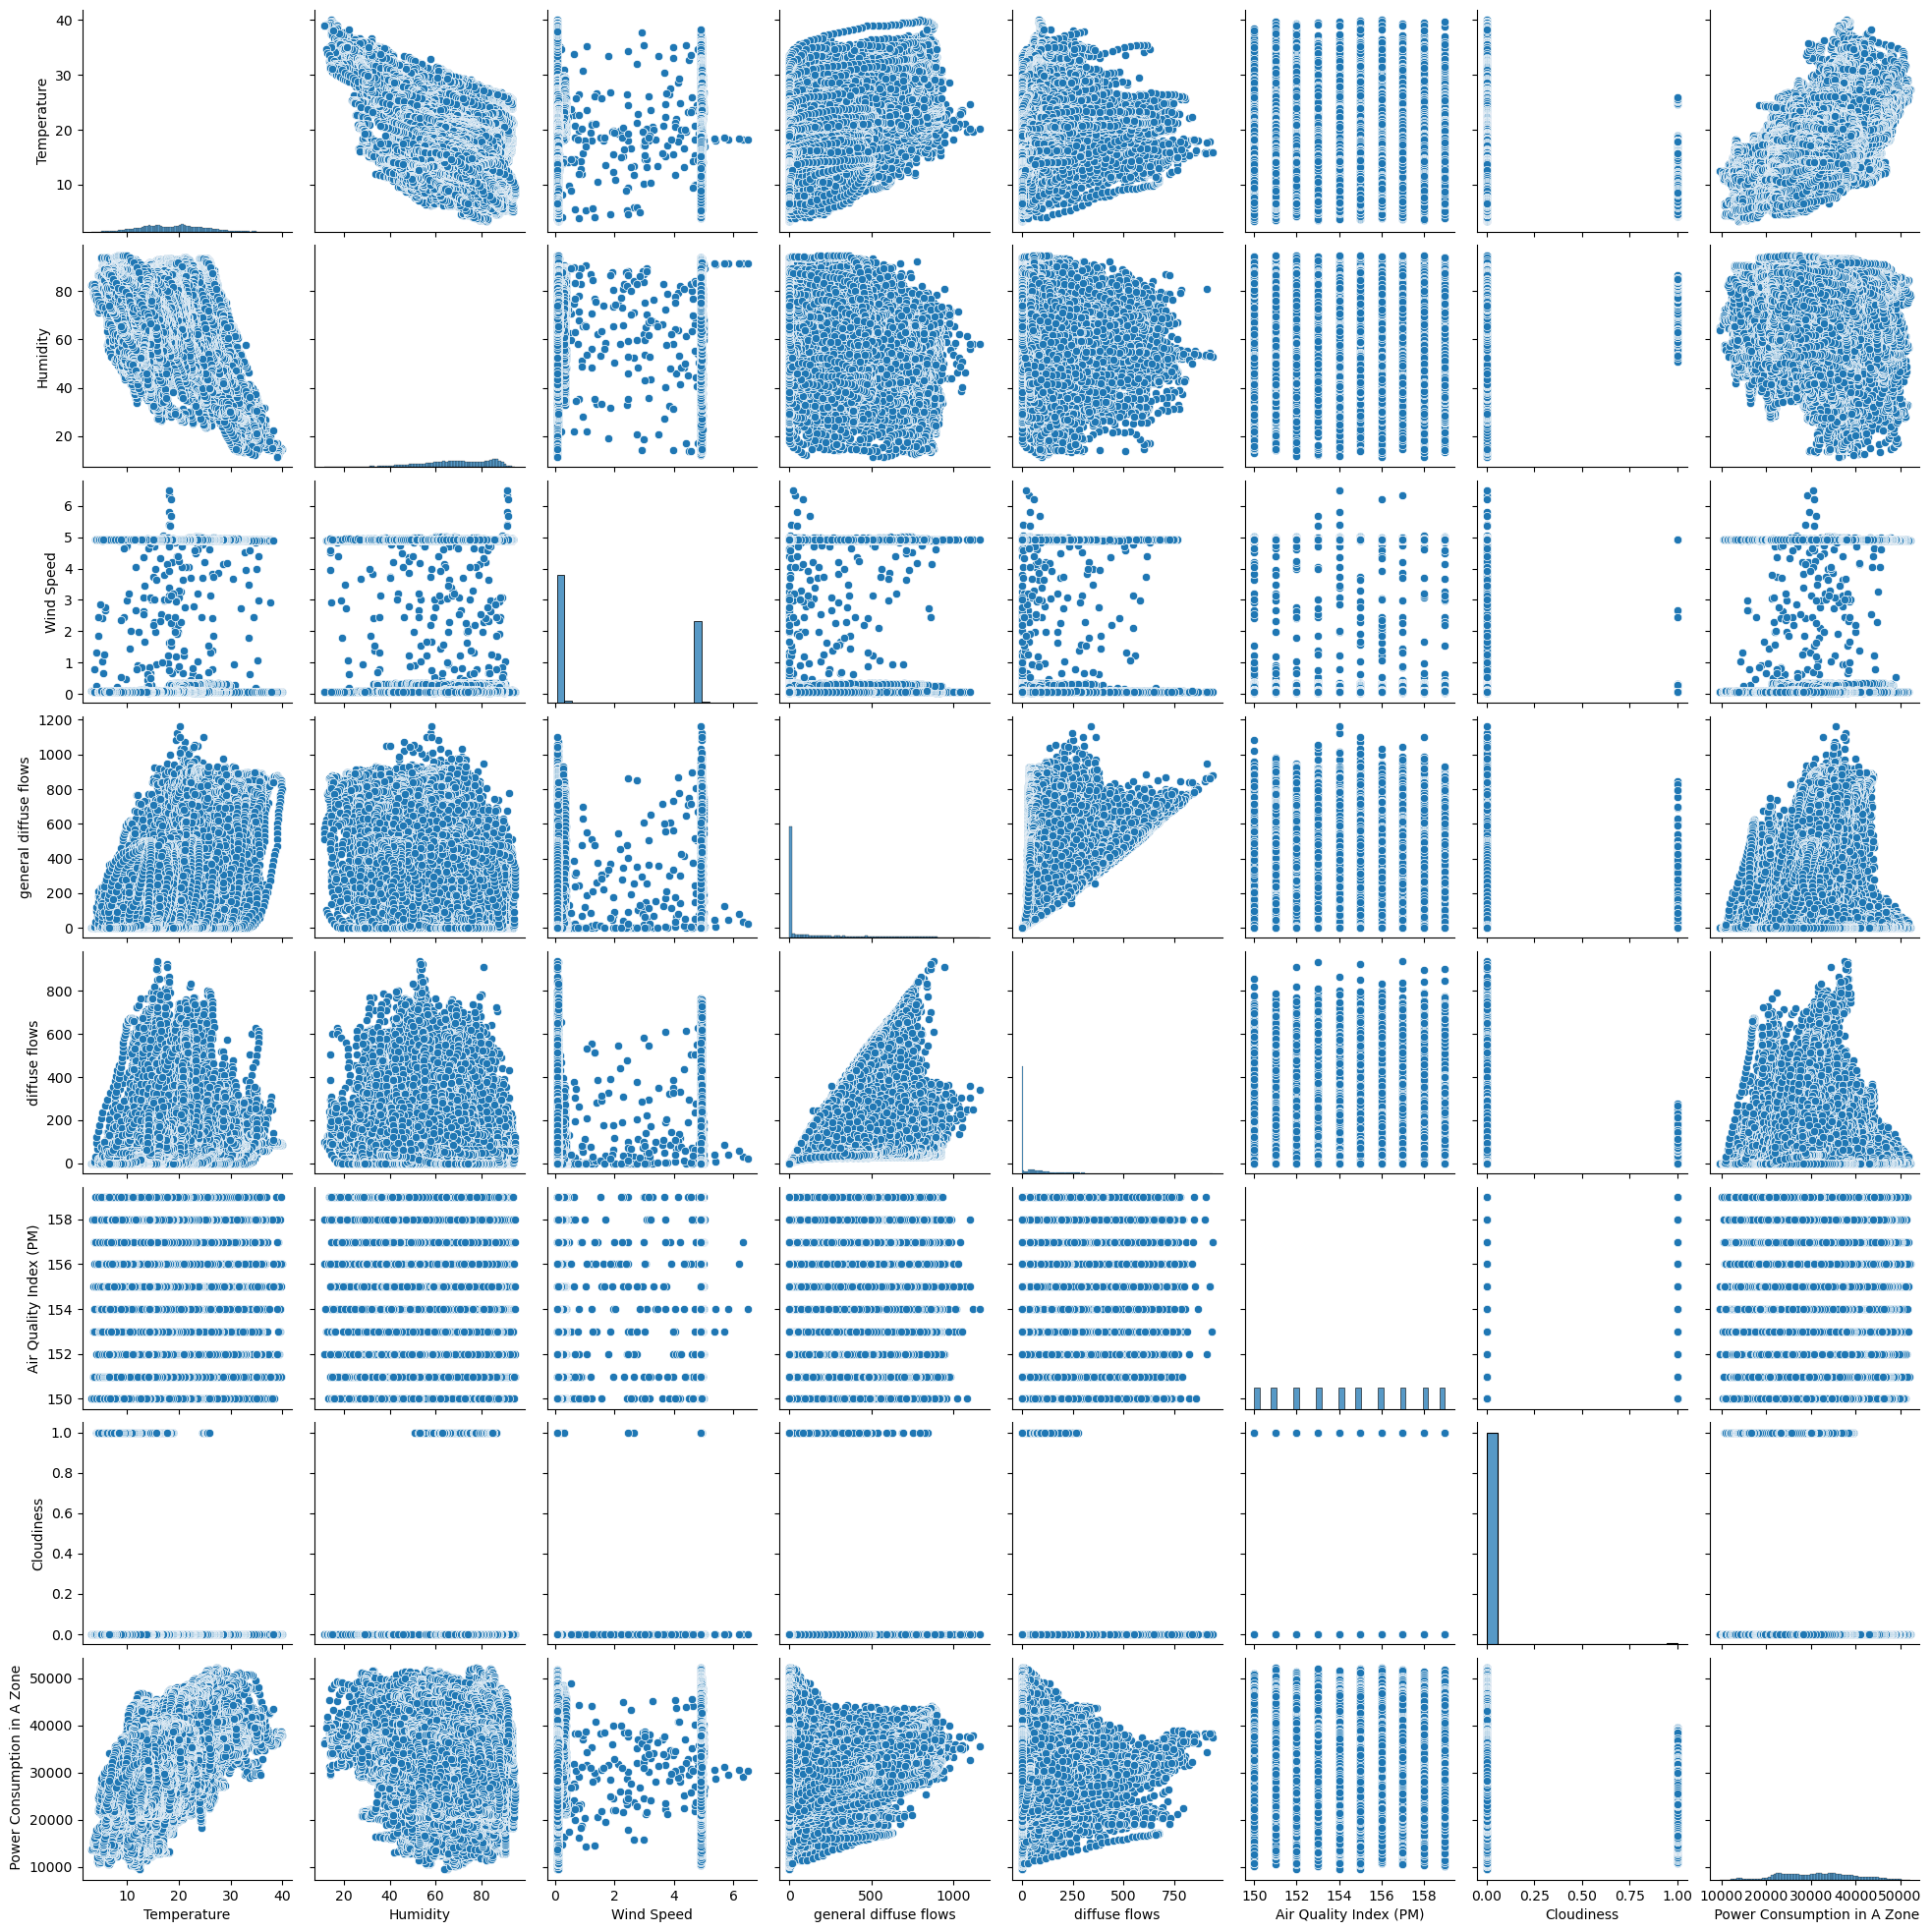

In [36]:
sns.pairplot(temp)

### <center> Splitting Data into Train and Test </center>

In [41]:
from sklearn.model_selection import train_test_split

X = temp.drop(' Power Consumption in A Zone',axis =1 )
y = temp[' Power Consumption in A Zone']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,shuffle = True)


In [42]:
X_train.shape

(39107, 7)

In [43]:
X_train.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness
33503,29.230,45.36,4.919,659.200,59.390,159.0,0
22940,19.470,74.90,0.079,148.100,132.800,152.0,0
24102,21.610,73.10,0.068,521.200,518.500,158.0,0
46973,5.688,85.90,4.916,0.051,0.152,154.0,0
25970,21.050,82.00,4.913,308.100,269.400,158.0,0


In [44]:
X_train.tail()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness
11539,10.29,89.00,0.079,0.084,0.152,151.0,0
44993,20.07,77.00,0.073,215.200,193.100,153.0,0
38413,23.29,68.16,4.923,108.200,112.500,155.0,0
1058,12.40,69.58,0.085,2.229,2.218,155.0,0
16050,16.93,81.20,0.070,323.200,271.900,151.0,0


In [45]:
X_train.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness
count,39107.000000,39107.000000,39107.000000,39107.000000,39107.000000,39107.000000,39107.000000
mean,18.819847,68.278043,1.963652,181.109492,74.841520,154.499169,0.006981
std,5.794788,15.544502,2.349682,263.543165,124.066554,2.868407,0.083260
min,3.541000,11.340000,0.050000,0.004000,0.011000,150.000000,0.000000
25%,14.440000,58.340000,0.078000,0.062000,0.122000,152.000000,0.000000
50%,18.820000,69.880000,0.086000,4.427000,3.986000,155.000000,0.000000
75%,22.850000,81.400000,4.915000,313.100000,100.900000,157.000000,0.000000
max,40.010000,94.800000,5.817000,1122.000000,936.000000,159.000000,1.000000


In [46]:
X_train["Cloudiness"].unique()

array([0, 1], dtype=int64)

### Basic Operations on Test Data

In [47]:
X_test.shape

(13036, 7)

In [48]:
X_test.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness
50759,11.82,82.10,0.083,432.500,55.950,159.0,0
24925,19.03,72.70,4.917,0.040,0.152,152.0,0
28693,21.40,55.63,4.913,3.097,2.486,154.0,0
670,18.22,52.65,0.089,265.600,161.900,156.0,0
11576,10.19,90.70,0.084,366.800,326.800,159.0,0


In [49]:
X_test.tail()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness
26278,26.37,57.97,4.920,804.000,126.900,151.0,0
47936,15.02,66.72,0.072,0.077,0.037,153.0,0
10232,10.71,83.30,0.083,0.040,0.141,150.0,0
31334,29.09,70.10,4.905,783.000,177.400,155.0,0
505,12.00,67.75,0.086,477.000,37.370,153.0,0


In [50]:
X_test.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness
count,13036.000000,13036.000000,13036.000000,13036.000000,13036.000000,13036.000000,13036.000000
mean,18.906163,68.117546,1.983069,188.147282,76.267261,154.500767,0.007211
std,5.855697,15.651023,2.354400,268.319769,125.531852,2.883241,0.084613
min,3.247000,11.340000,0.053000,0.007000,0.022000,150.000000,0.000000
25%,14.430000,58.050000,0.078000,0.065000,0.122000,152.000000,0.000000
50%,18.900000,69.765000,0.086000,6.730500,6.081000,154.000000,0.000000
75%,23.110000,81.400000,4.915000,336.500000,102.400000,157.000000,0.000000
max,39.780000,94.700000,6.483000,1163.000000,933.000000,159.000000,1.000000


In [51]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13036 entries, 50759 to 505
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature             13036 non-null  float64
 1   Humidity                13036 non-null  float64
 2   Wind Speed              13036 non-null  float64
 3   general diffuse flows   13036 non-null  float64
 4   diffuse flows           13036 non-null  float64
 5   Air Quality Index (PM)  13036 non-null  float64
 6   Cloudiness              13036 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 814.8 KB


In [52]:
X_test["Cloudiness"].unique()

array([0, 1], dtype=int64)

### Basic operations on Y

In [53]:
y_train.shape

(39107,)

In [54]:
y_test.shape

(13036,)

In [55]:
y_train.head()

33503    37852.34184
22940    23014.56954
24102    26498.54305
46973    21636.92308
25970    25595.76159
Name:  Power Consumption in A Zone, dtype: float64

In [56]:
y_train.tail()

11539    22807.14894
44993    29415.38462
38413    35343.71681
1058     12240.72948
16050    35527.23358
Name:  Power Consumption in A Zone, dtype: float64

In [57]:
y_test.head()

50759    32316.34981
24925    42824.90066
28693    25285.31561
670      21534.34650
11576    31312.34043
Name:  Power Consumption in A Zone, dtype: float64

In [58]:
y_test.tail()

26278    32448.63787
47936    37015.38462
10232    25147.91489
31334    38606.70366
505      22154.40729
Name:  Power Consumption in A Zone, dtype: float64

In [59]:
y_test.describe()

count    13036.000000
mean     31158.350401
std       8010.700742
min       9505.167173
25%      24799.430050
50%      31276.045630
75%      36856.651692
max      51955.072140
Name:  Power Consumption in A Zone, dtype: float64

In [60]:
y_train.describe()

count    39107.000000
mean     31097.492805
std       8006.802567
min       9457.750760
25%      24806.494665
50%      31215.209130
75%      36727.877460
max      52204.395120
Name:  Power Consumption in A Zone, dtype: float64

In [61]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 13036 entries, 50759 to 505
Series name:  Power Consumption in A Zone
Non-Null Count  Dtype  
--------------  -----  
13036 non-null  float64
dtypes: float64(1)
memory usage: 203.7 KB


In [62]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 39107 entries, 33503 to 16050
Series name:  Power Consumption in A Zone
Non-Null Count  Dtype  
--------------  -----  
39107 non-null  float64
dtypes: float64(1)
memory usage: 611.0 KB


### <center> Feature Scaling </center>

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
X_train_scaled

array([[ 1.79649115, -1.47436923,  1.25778129, ..., -0.12454378,
         1.56912484, -0.08384463],
       [ 0.1121976 ,  0.4260054 , -0.80209864, ...,  0.46716234,
        -0.87128533, -0.08384463],
       [ 0.48149967,  0.31020735, -0.80678019, ...,  3.57601739,
         1.22049481, -0.08384463],
       ...,
       [ 0.77141905, -0.00759396,  1.25948367, ...,  0.30353839,
         0.17460474, -0.08384463],
       [-1.10787979,  0.08375783, -0.79954507, ..., -0.58536685,
         0.17460474, -0.08384463],
       [-0.32613289,  0.83129856, -0.805929  , ...,  1.58834911,
        -1.21991535, -0.08384463]])

In [65]:
X_test_scaled

array([[-1.20797101,  0.88919759, -0.80039626, ..., -0.15227119,
         1.56912484, -0.08384463],
       [ 0.03626634,  0.28447445,  1.2569301 , ..., -0.60201942,
        -0.87128533, -0.08384463],
       [ 0.44525975, -0.81367703,  1.25522772, ..., -0.5832067 ,
        -0.17402528, -0.08384463],
       ...,
       [-1.39952488,  0.96639628, -0.80039626, ..., -0.60210808,
        -1.56854538, -0.08384463],
       [ 1.77233121,  0.1172106 ,  1.25182296, ...,  0.82665141,
         0.17460474, -0.08384463],
       [-1.17690822, -0.03397018, -0.79911948, ..., -0.30203143,
        -0.52265531, -0.08384463]])

### <center> Linear Regression </center>

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))

R² Score: 0.32938581444543047
MSE: 43030900.59853562
RMSE: 6559.794249710551


### <center> Decision Tree Regression </center>

In [67]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)

In [68]:
print("MSE : ",mean_squared_error(y_test ,dt_pred))
print("RMSE : ",root_mean_squared_error(y_test ,dt_pred))
print("R2 : ",r2_score(y_test ,dt_pred))

MSE :  45760104.08738469
RMSE :  6764.621503630835
R2 :  0.2868525987927353


### <center> Gradient Descent </center>

In [132]:
x = X_train_scaled
y = np.array(y_train).reshape(-1, 1) 
m, n = x.shape

w = np.zeros((n, 1))
b = 0
alpha = 0.21
epochs = 500
error_prev = float('inf')
num_iter = 0
for i in range(0,500):
    num_iter +=1
    # Prediction
    yp = x @ w + b  # shape (39000, 1)

    # Cost Function (Mean Squared Error)
    error = np.mean((y - yp) ** 2)
    #if(error > error_prev):
    #   break;
    # Gradients
    w_g = (-2 / m) * x.T @ (y - yp)         
    b_g = (-2 / m) * np.sum(y - yp)      

    # Update weights and bias
    w = w - alpha * w_g
    b = b - alpha * b_g

    # Monitor loss
    if i % 20 == 0:
        print(f"Epoch {i} - Loss: {error}")
    error_prev = error
    

print("Weight:", w)
print("Bias:", b)
print(num_iter)

Epoch 0 - Loss: 1031161306.7591968
Epoch 20 - Loss: 43347204.389123924
Epoch 40 - Loss: 43338869.67013496
Epoch 60 - Loss: 43338854.82550202
Epoch 80 - Loss: 43338854.79442776
Epoch 100 - Loss: 43338854.79436013
Epoch 120 - Loss: 43338854.794359975
Epoch 140 - Loss: 43338854.794359975
Epoch 160 - Loss: 43338854.79435998
Epoch 180 - Loss: 43338854.79435998
Epoch 200 - Loss: 43338854.79435998
Epoch 220 - Loss: 43338854.79435998
Epoch 240 - Loss: 43338854.794359975
Epoch 260 - Loss: 43338854.794359975
Epoch 280 - Loss: 43338854.794359975
Epoch 300 - Loss: 43338854.794359975
Epoch 320 - Loss: 43338854.794359975
Epoch 340 - Loss: 43338854.794359975
Epoch 360 - Loss: 43338854.794359975
Epoch 380 - Loss: 43338854.794359975
Epoch 400 - Loss: 43338854.794359975
Epoch 420 - Loss: 43338854.794359975
Epoch 440 - Loss: 43338854.794359975
Epoch 460 - Loss: 43338854.794359975
Epoch 480 - Loss: 43338854.794359975
Weight: [[5071.21295278]
 [ 163.81547419]
 [-777.29840968]
 [-335.59720884]
 [-282.503400

In [124]:
print("RMSE:", mean_squared_error(y, yp, squared=False))
print("R²:", r2_score(y, yp))

RMSE: 6583.225257756261
R²: 0.3239632626754557


C:\Users\99406\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [133]:
print(lr.coef_, lr.intercept_)

[5071.21295278  163.81547419 -777.29840968 -335.59720884 -282.50340063
   11.05419134 -449.46933681] 31097.492804616675


In [107]:
x.shape

(39107, 7)

In [109]:
w.shape

(7, 1)

### <center>XGBOOST</center>

In [73]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

model = XGBRegressor( n_estimators=100, learning_rate=0.1)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Use Negative MSE for scoring (sklearn convention: higher is better, so MSE is negated)
mse_scores = cross_val_score(model,X, y, scoring='neg_mean_squared_error', cv=kf)
rmse_scores = np.sqrt(-mse_scores)  # Convert to RMSE

print("RMSE for each fold:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())
print("Standard Deviation of RMSE:", rmse_scores.std())
r2_scores = cross_val_score(model, X, y, scoring='r2', cv=kf)
print("R² for each fold:", r2_scores)
print("Mean R²:", r2_scores.mean())


RMSE for each fold: [5583.61976516 5493.44679372 5430.55068795 5544.84738748 5549.96510699
 5561.14698957 5429.02011747 5498.43597339 5609.83667982 5591.13802326]
Mean RMSE: 5529.200752482038
Standard Deviation of RMSE: 60.81871172646679
R² for each fold: [0.51996176 0.52630072 0.53685307 0.5227625  0.52378661 0.50718764
 0.52754764 0.53234252 0.52201071 0.51239723]
Mean R²: 0.5231150391404035


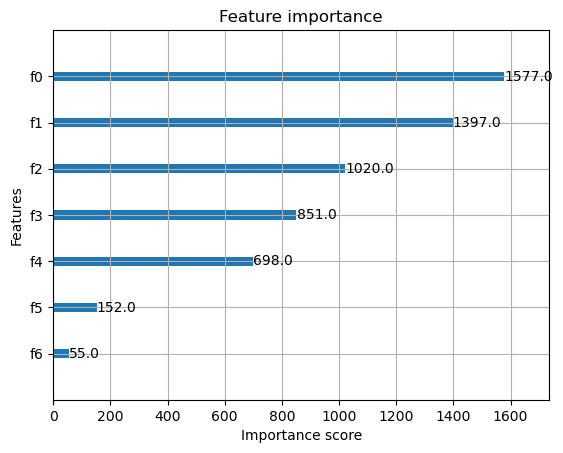

In [74]:
from xgboost import plot_importance
model.fit(X_train_scaled,y_train)
plot_importance(model)
plt.show()


### <center>Random Forest Regressor</center>

In [71]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
root_mean_squared_error
print("RMSE:", root_mean_squared_error(y_test, y_pred))

R² Score: 0.6306618254894232
MSE: 23699102.430209458
RMSE: 4868.172391176124


### <center>Random Forest With Grid Search</center>

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
rf1  = RandomForestRegressor()

param_grid = {
    'n_estimators': [101,201,301],           # number of trees
    'max_depth': [None,5, 10, 15, 20],           # maximum depth of the tree
    'min_samples_split': [2, 5, 10],           # minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4],             # minimum samples at a leaf node,  # number of features to consider when looking for best split                 # whether bootstrap samples are used
}
grid_search = GridSearchCV(estimator=rf1, param_grid=param_grid,cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Root Mean Square (neg)", grid_search.best_score_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("RMS : ", root_mean_squared_error(y_test,y_pred))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))
print("R2 : ",r2_score(y_test,y_pred))

Fitting 5 folds for each of 135 candidates, totalling 675 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 301}
Best Root Mean Square (neg) -25075536.531725377
RMS :  4833.332997123141
Mean Absolute Error :  3371.909174045065
R2 :  0.6359292949020146


### <center> Suport Vector Machine </center>

In [139]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# Step 1: Scale X and y
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit and transform X_train and y_train
X_train_scaled_svm = scaler_X.fit_transform(X_train)
X_test_scaled_svm = scaler_X.transform(X_test)

y_train_scaled_svm = scaler_y.fit_transform(y_train.to_numpy().reshape(-1, 1)).ravel()

# Step 2: Train SVR
svr = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)
svr.fit(X_train_scaled_svm, y_train_scaled_svm)

# Step 3: Predict and inverse transform
y_pred_scaled = svr.predict(X_test_scaled_svm)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Step 4: Evaluate performance using original y_test
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")


R² Score: 0.3681
RMSE: 6367.7116


C:\Users\99406\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Performance Comparision

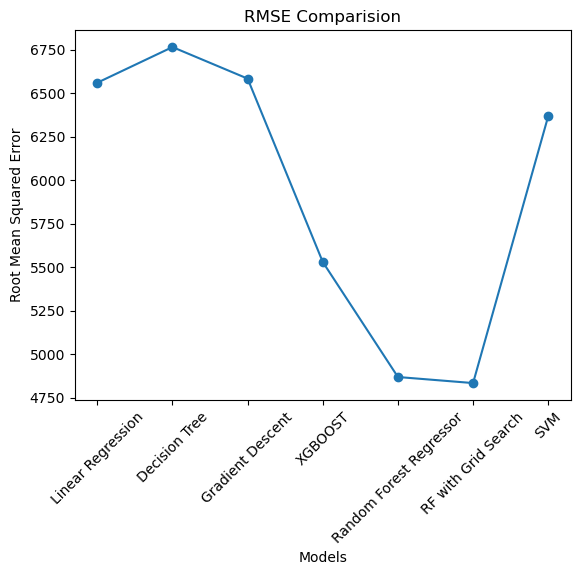

In [145]:
#RMSE 
error = [6559.794249710551,6764.621503630835,6583.225257756261,5529.200752482038,4868.172391176124,4833.332997123141,6367.7116]
labels = ["Linear Regression", "Decision Tree", "Gradient Descent" , "XGBOOST" ,"Random Forest Regressor" , "RF with Grid Search" ,"SVM"]

plt.plot(labels , error,marker = "o")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.ylabel("Root Mean Squared Error")
plt.title("RMSE Comparision")
plt.show()

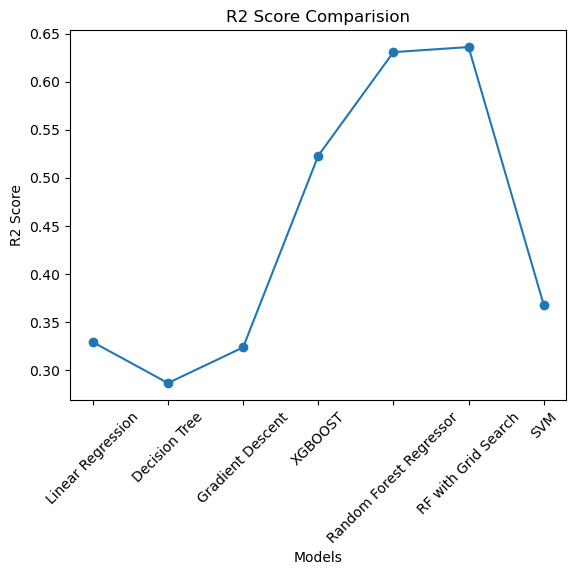

In [2]:
#r2_score

error = [0.32938581444543047,0.2868525987927353,0.3239632626754557,0.5231150391404035,0.6306618254894232,0.6359292949020146,0.3681]
labels = ["Linear Regression", "Decision Tree", "Gradient Descent" , "XGBOOST" ,"Random Forest Regressor" , "RF with Grid Search" ,"SVM"]

plt.plot(labels , error,marker = "o")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.ylabel("R2 Score")
plt.title("R2 Score Comparision")
plt.show()